<a href="https://colab.research.google.com/github/safiraaninda/Tugas-Akhir-PCD/blob/main/leaf_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Library**

In [3]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Loaded all libraries")

Loaded all libraries


Mengetahui kelas pada citra

In [4]:
fpath = "/content/drive/MyDrive/PCD/StrawberryDataset"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:2]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Strawberry_healthy', 'Strawberry_scorch'] 

No. of categories =  2


Mengetahui jumlah kelas pada citra

In [5]:
def count_images_per_category(categories):
    image_counts = {}
    for category in categories:
        image_count = len(os.listdir(os.path.join(fpath, category)))
        image_counts[category] = image_count
    return image_counts

image_counts = count_images_per_category(categories)
print(image_counts)


{'Strawberry_healthy': 1095, 'Strawberry_scorch': 1058}


**Fungsi mengubah image menjadi channel LAB dan mengubahnya nilainya menjadi array**

In [6]:
def load_images_and_labels(categories):
    images=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

            img_array = Image.fromarray(img, 'LAB')

            images.append(np.array(img_array))

            labels.append(index)
    return images, labels

images, labels = load_images_and_labels(categories)

images = np.array(images)
labels = np.array(labels)


**Menampilkan random image yang dengan channel LAB**

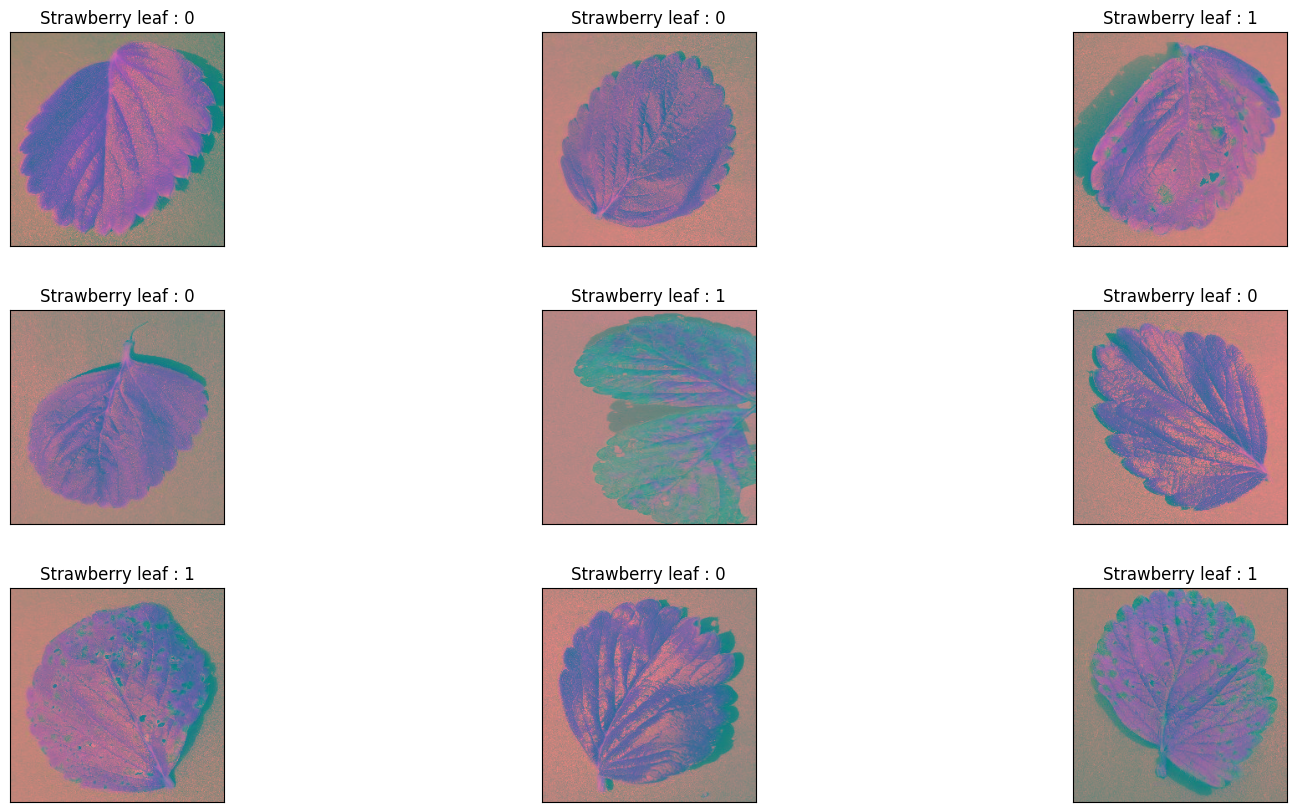

In [7]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0
    for i in range(9):
        n += 1
        r = np.random.randint(0 , images.shape[0] , 1)

        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])

        plt.title('Strawberry leaf : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])

    plt.show()

display_rand_images(images, labels)

**Menampilkan plot channel LAB yang sudah di split**

No. of images loaded =  2153 
No. of labels loaded =  2153
Type of images : <class 'list'> 
Type of labels =  <class 'list'>


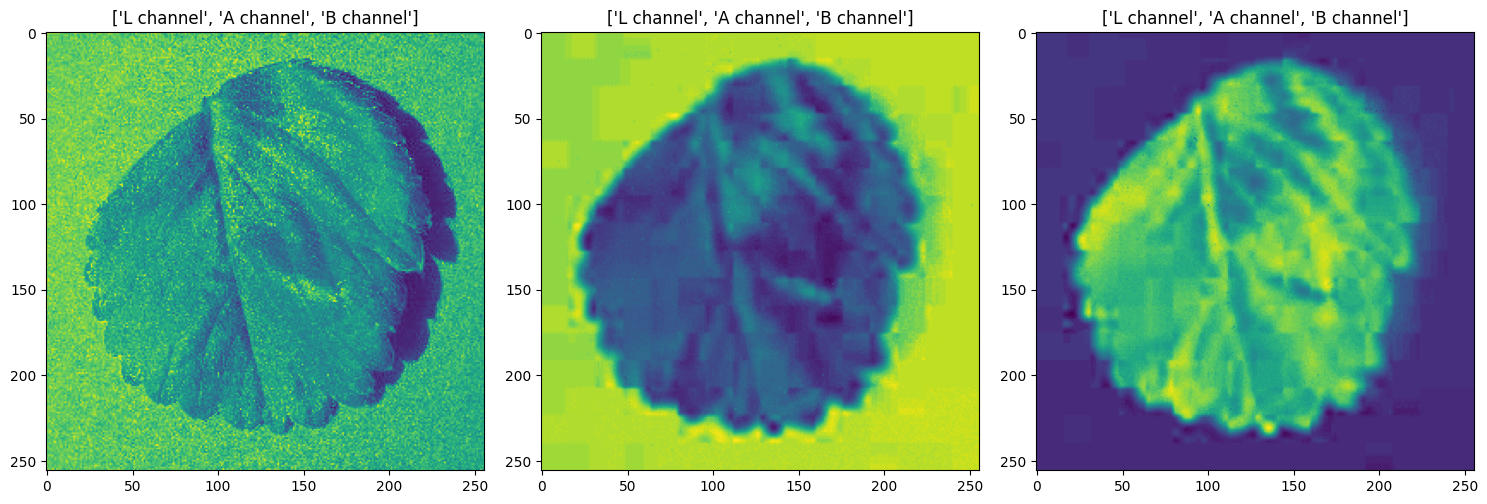

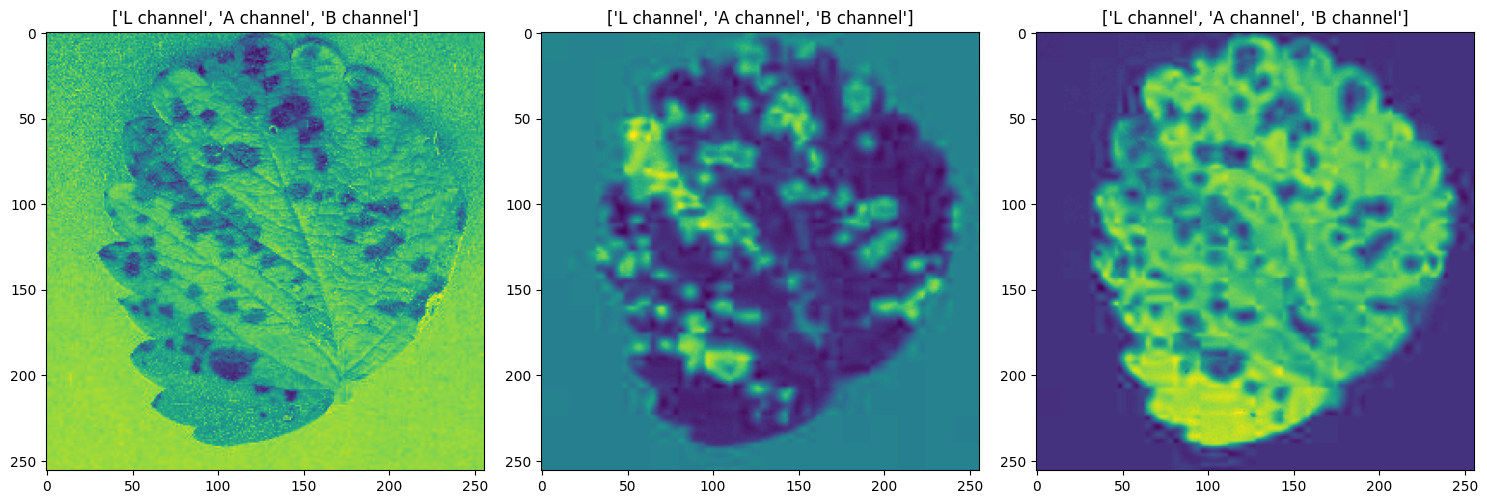

In [8]:
def load_images_and_labels(categories):
    images=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

            # Split L*a*b
            L, A, B = cv2.split(img)

            # Menambahkan setiap saluran (channel) ke dalam img
            images.append([L, A, B])

            labels.append(index)

    return images, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print("Type of images :", type(images),"\nType of labels = ", type(labels))


# Fungsi untuk menampilkan plot hasil LAB
def plot_lab(image):
    L, A, B = image

    titles = ['L channel', 'A channel', 'B channel']

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, (channel, title) in enumerate(zip([L, A, B], titles)):
        axes[i].imshow(channel)
        axes[i].set_title(titles)
    plt.tight_layout()
    plt.show()

# Menampilkan contoh citra dari dataset
sample_index = 900  # Ganti dengan indeks citra yang ingin ditampilkan
plot_lab(images[sample_index])

# Menampilkan contoh citra dari dataset
sample_index = 1500  # Ganti dengan indeks citra yang ingin ditampilkan
plot_lab(images[sample_index])

**Melakukan thresholding pada citra**

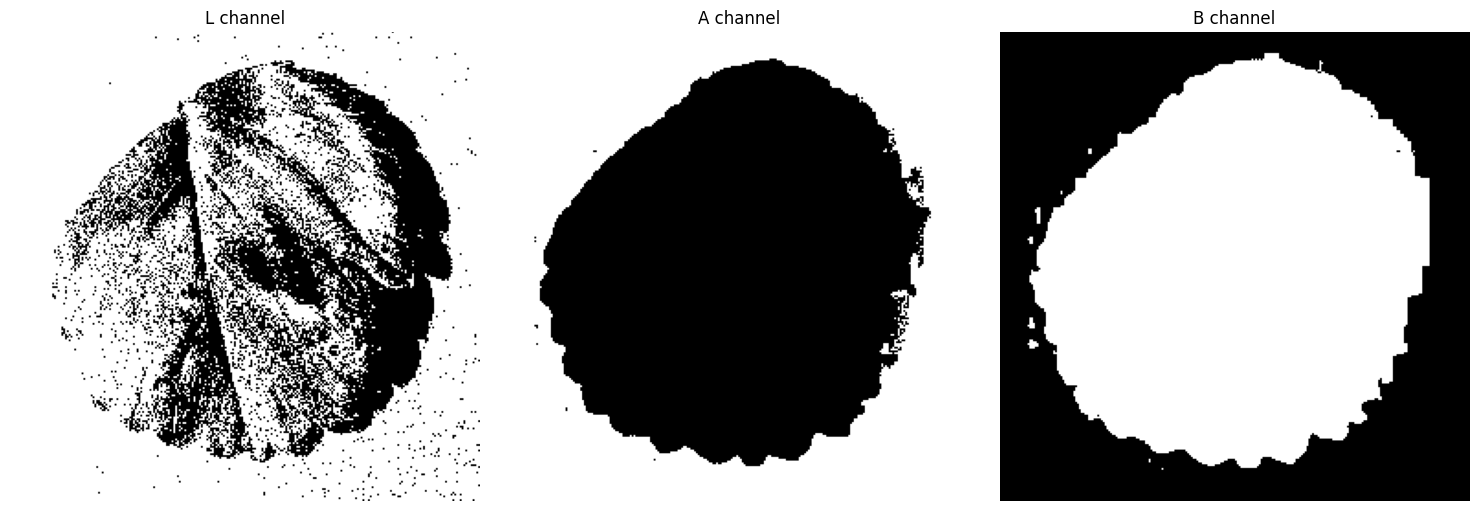

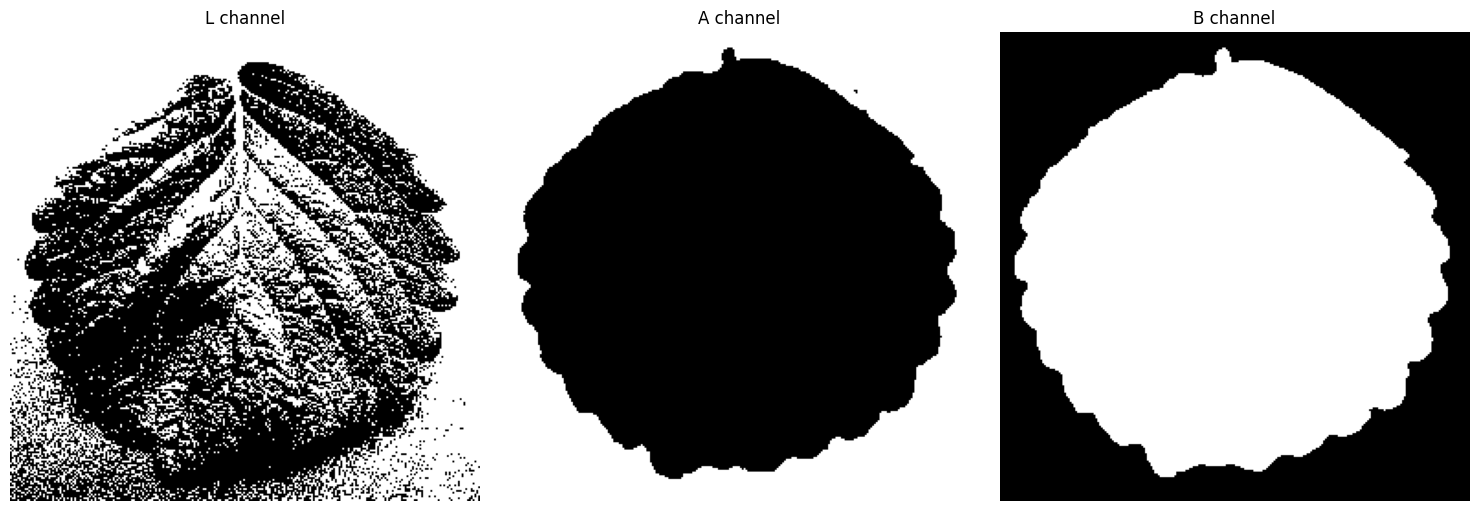

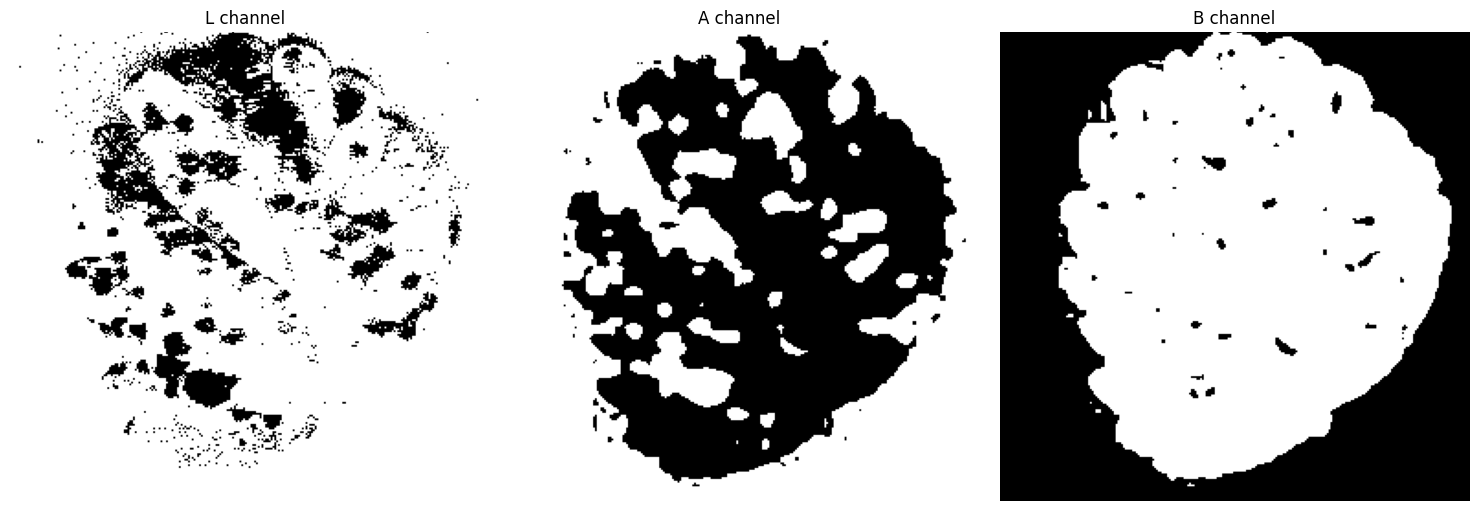

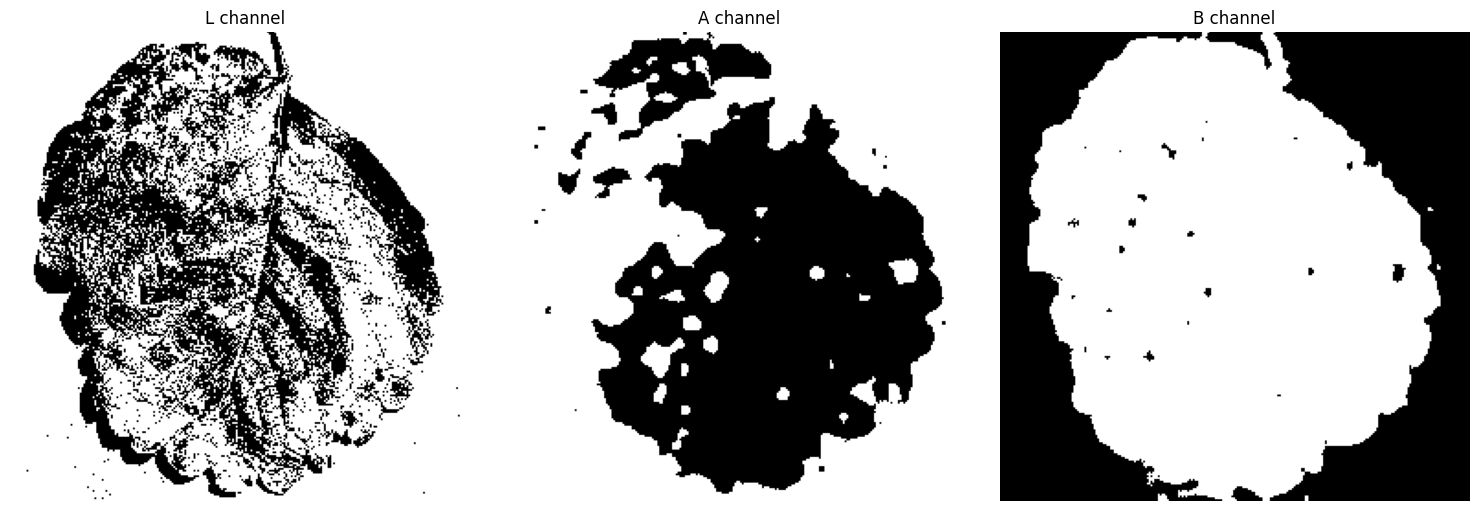

In [9]:
def threshold_images(images, threshold_value):
    thresholded_images = []

    for image in images:
        L, A, B = image[0], image[1], image[2]

        # Thresholding pada saluran L
        _, L_thresholded = cv2.threshold(L, threshold_value, 255, cv2.THRESH_BINARY)

        # Thresholding pada saluran A
        _, A_thresholded = cv2.threshold(A, threshold_value, 255, cv2.THRESH_BINARY)

        # Thresholding pada saluran B
        _, B_thresholded = cv2.threshold(B, threshold_value, 255, cv2.THRESH_BINARY)

        # Menggabungkan hasil thresholding dari ketiga saluran
        thresholded_image = cv2.merge([L_thresholded, A_thresholded, B_thresholded])

        thresholded_images.append(thresholded_image)

    return thresholded_images

def plot_lab(image):
    L_thresholded, A_thresholded, B_thresholded = cv2.split(image)

    titles = ['L channel', 'A channel', 'B channel']

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, (channel, title) in enumerate(zip([L_thresholded, A_thresholded, B_thresholded], titles)):
        axes[i].imshow(channel, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


# Menjalankan thresholding pada citra-citra dalam variabel images dengan threshold_value yang diinginkan
threshold_value = 128  # Ganti dengan nilai threshold yang diinginkan
thresholded_images = threshold_images(images, threshold_value)

# Menampilkan contoh citra hasil thresholding
sample_index = 900  # Ganti dengan indeks citra yang ingin ditampilkan
plot_lab(thresholded_images[sample_index])
sample_index = 120  # Ganti dengan indeks citra yang ingin ditampilkan
plot_lab(thresholded_images[sample_index])

# Menampilkan contoh citra hasil thresholding
sample_index = 1500  # Ganti dengan indeks citra yang ingin ditampilkan
plot_lab(thresholded_images[sample_index])
sample_index = 1750  # Ganti dengan indeks citra yang ingin ditampilkan
plot_lab(thresholded_images[sample_index])



**Training : Testing = 80:20**

In [10]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=random_seed)

# Menampilkan informasi jumlah data
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 1722
Jumlah data testing: 431


memastikan kembali akurasi dari channel yang dipilih adalah yang tertinggi

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# Daftar channel yang akan diuji
channels = [0, 1, 2]  # Indeks 0: L channel, Indeks 1: A channel, Indeks 2: B channel

# Inisialisasi variabel untuk menyimpan hasil evaluasi performa
accuracy_scores = []

# Evaluasi performa untuk setiap channel
for channel in channels:
    # Memilih channel yang akan digunakan
    X_train_channel = [image[channel].flatten() for image in X_train]
    X_test_channel = [image[channel].flatten() for image in X_test]

    # Melatih model KNN
    knn.fit(X_train_channel, y_train)

    # Menguji performa model pada dataset pengujian
    y_pred = knn.predict(X_test_channel)
    accuracy = accuracy_score(y_test, y_pred)

    # Menyimpan akurasi untuk channel tersebut
    accuracy_scores.append(accuracy)

    print(f"Accuracy using channel {channel}: {accuracy}")

# Memilih channel dengan akurasi tertinggi
best_channel = channels[accuracy_scores.index(max(accuracy_scores))]
print(f"Best channel: {best_channel}")


Accuracy using channel 0: 0.654292343387471
Accuracy using channel 1: 0.8329466357308585
Accuracy using channel 2: 0.6589327146171694
Best channel: 1


**Membuat Model KNN**

**K = 3**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi dan latih model KNN
k = 3  # Jumlah tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=k)

# Memilih channel yang akan dimodelkan
selected_channel = 1  # Channel A

# Memilih feature dari channel yang dipilih
X_train_selected = np.array([image[selected_channel].flatten() for image in X_train])
X_test_selected = np.array([image[selected_channel].flatten() for image in X_test])

knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using selected channel: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy using selected channel: 0.8352668213457076
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       211
           1       1.00      0.68      0.81       220

    accuracy                           0.84       431
   macro avg       0.87      0.84      0.83       431
weighted avg       0.88      0.84      0.83       431



In [13]:
#check the training score (Seberapa valid (bener ngga) sama data training)
print(knn.score(X_train_selected, y_train))

#check the validation score (Seberapa valid (bener ngga) sama data test)
print(knn.score(X_test_selected, y_test))

0.8397212543554007
0.8352668213457076


**K = 5**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi dan latih model KNN
k = 5  # Jumlah tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=k)

# Memilih channel yang akan dimodelkan
selected_channel = 1  # Channel A

# Memilih feature dari channel yang dipilih
X_train_selected = np.array([image[selected_channel].flatten() for image in X_train])
X_test_selected = np.array([image[selected_channel].flatten() for image in X_test])

knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using selected channel: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy using selected channel: 0.8329466357308585
              precision    recall  f1-score   support

           0       0.75      1.00      0.85       211
           1       1.00      0.67      0.80       220

    accuracy                           0.83       431
   macro avg       0.87      0.84      0.83       431
weighted avg       0.88      0.83      0.83       431



In [15]:
#check the training score (Seberapa valid (bener ngga) sama data training)
print(knn.score(X_train_selected, y_train))

#check the validation score (Seberapa valid (bener ngga) sama data test)
print(knn.score(X_test_selected, y_test))

0.8356562137049942
0.8329466357308585


**K = 7**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi dan latih model KNN
k = 7  # Jumlah tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=k)

# Memilih channel yang akan dimodelkan
selected_channel = 1  # Channel A

# Memilih feature dari channel yang dipilih
X_train_selected = np.array([image[selected_channel].flatten() for image in X_train])
X_test_selected = np.array([image[selected_channel].flatten() for image in X_test])

knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using selected channel: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy using selected channel: 0.8259860788863109
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       211
           1       1.00      0.66      0.79       220

    accuracy                           0.83       431
   macro avg       0.87      0.83      0.82       431
weighted avg       0.87      0.83      0.82       431



In [17]:
#check the training score (Seberapa valid (bener ngga) sama data training)
print(knn.score(X_train_selected, y_train))

#check the validation score (Seberapa valid (bener ngga) sama data test)
print(knn.score(X_test_selected, y_test))

0.829849012775842
0.8259860788863109


**cross validation**

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train_selected, y_train, cv=5, scoring='accuracy')
print(scores)

[0.82608696 0.8173913  0.81395349 0.78488372 0.83430233]


**Plot KNN**
secara keseluruhan

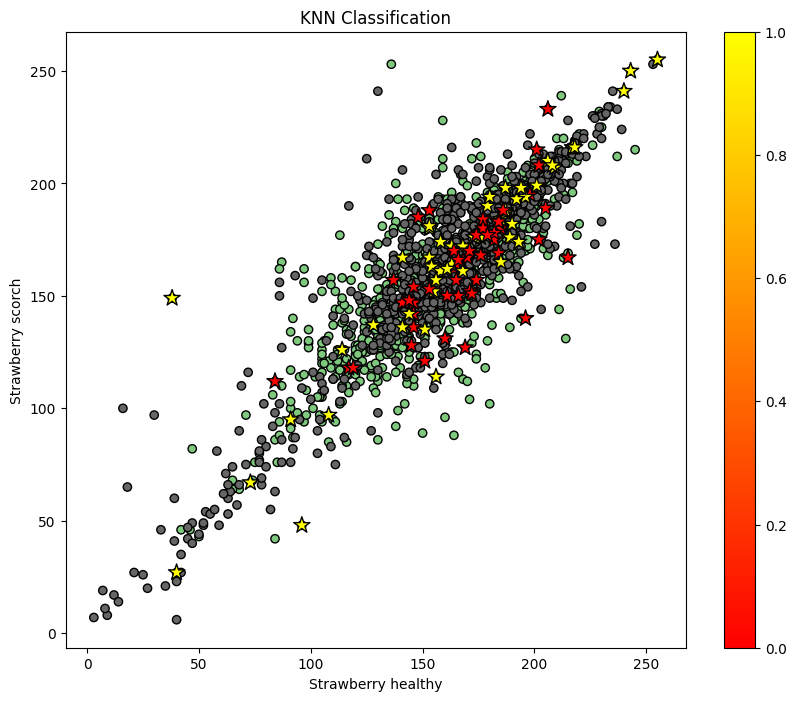

In [38]:
import numpy as np

X_train = np.array(images)
X_test = np.array(images)
y_train = np.array(labels)
y_test = np.array(labels)

# Meratakan data citra
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_train_flat = y_train.reshape(y_train.shape[0], -1)
y_test_flat = y_test.reshape(y_test.shape[0], -1)

# Memilih beberapa titik pada dataset untuk visualisasi
num_samples = 100
sample_indices = np.random.choice(len(X_train_flat), num_samples, replace=False)
sample_points = X_train_flat[sample_indices]
sample_labels = y_train_flat[sample_indices]

# Membuat plot
plt.figure(figsize=(10, 8))
plt.scatter(X_train_flat[:, 0], X_train_flat[:, 1], c=y_train_flat, cmap='Accent', edgecolor='k')
plt.scatter(sample_points[:, 0], sample_points[:, 1], c=sample_labels, cmap='autumn', edgecolor='k', s=150, marker='*')
plt.xlabel('Strawberry healthy')
plt.ylabel('Strawberry scorch')
plt.title('KNN Classification')
plt.colorbar()
plt.show()


**Plot KNN** dengan channel A

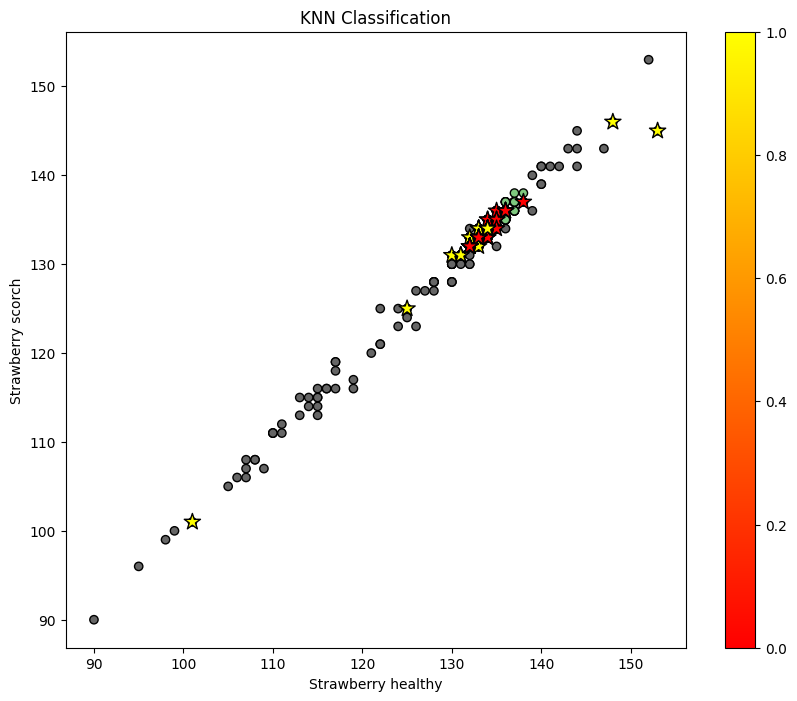

In [31]:
# Memilih beberapa titik pada dataset untuk visualisasi
num_samples = 100
sample_indices = np.random.choice(len(X_train_selected), num_samples, replace=False)
sample_points = X_train_selected[sample_indices]
sample_labels = np.array(y_train)[sample_indices]

# Membuat plot
plt.figure(figsize=(10, 8))
plt.scatter(X_train_selected[:, 0], X_train_selected[:, 1], c=y_train, cmap='Accent', edgecolor='k')
plt.scatter(sample_points[:, 0], sample_points[:, 1], c=sample_labels, cmap='autumn', edgecolor='k', s=150, marker='*')
plt.xlabel('Strawberry healthy')
plt.ylabel('Strawberry scorch')
plt.title('KNN Classification')
plt.colorbar()
plt.show()
